<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/IMT_ex_avaliativo_graphs_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [ ]:
#@markdown Nome completo e RA (*\<nome\>, \<RA\>*)
Aluno = 'Daniel Henrique, 1115665' #@param {type:"string"}






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "https://github.com/Rogerio-mack/IMT_CD_2025/raw/refs/heads/main/data/"


# **Case: Café**

Marcas de café têm na embalagem anotado que o peso líquido é de 1 Kg $\pm$ 0.05 (distribuição normal). Você quer fazer uma rotina para analisar amostras de diferentes fornecedores, rejeitando fornecedores cuja as amostras estão estão abaixo do intervalo de confiança de 95% do peso, embora aceite pesos acima. Para facilitar o uso da rotina pelo time comercial você faz uma rotina que exibe o resultado sobre as amostras como a seguir.

Dicas (opcionais):
1. Você vai empregar as funções `norm.pdf()` e `norm.ppf()`
2. Para o sobreado abaixo da curva empregue `ax.fill_between()`
3. Assinatura sugerida da função: `def analisa_amostra(df, mu, sigma, ax)`





In [ ]:
df1 = pd.read_csv(path + 'amostra_cafe_1.csv')
display(df1.head())
df2 = pd.read_csv(path + 'amostra_cafe_2.csv')
display(df2.head())
df3 = pd.read_csv(path + 'amostra_cafe_3.csv')
display(df3.head())

,peso_cafe
0,1.006539
1,0.922261
2,0.883683
3,0.979279
4,1.007257


,peso_cafe
0,1.002032
1,0.941586
2,0.991946
3,1.001016
4,1.058258


,peso_cafe
0,0.964969
1,0.920406
2,0.984333
3,1.056115
4,0.918081


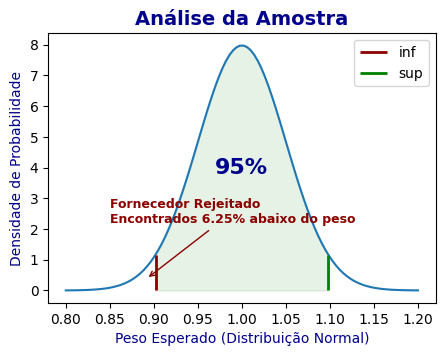

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5, 3.5))

mu = 1
sigma = 0.05

analisa_amostra(df3, mu, sigma, ax)
plt.show()

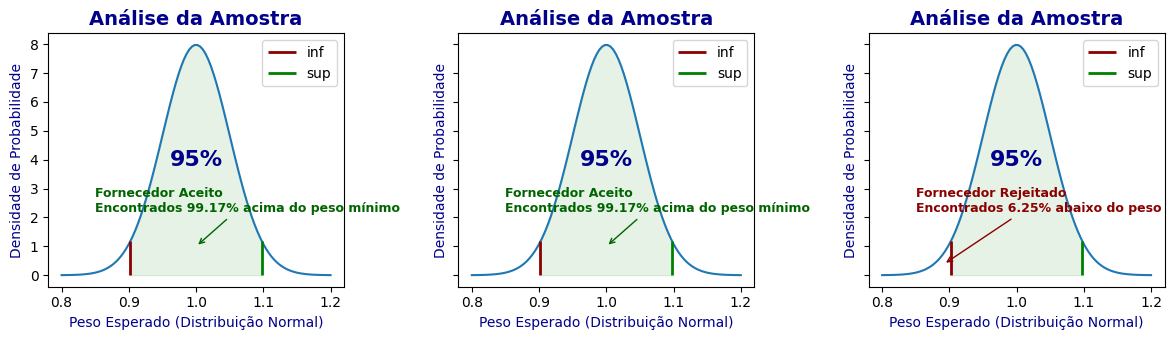

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12, 3.5),sharey=True)

mu = 1
sigma = 0.05

for i, df in zip(range(3),[df1, df2, df3]):
  analisa_amostra(df, mu, sigma, ax[i])

plt.tight_layout()
plt.show()

A rotina ainda deve funcionar para outras embalagens de café, como sacas de 60Kg, pacotes de 10 e 5Kg etc. que apresentam peso médio e desvio padrão diferente. Abaixo, a análise de sacas de 60Kg $\pm$ 0.1.

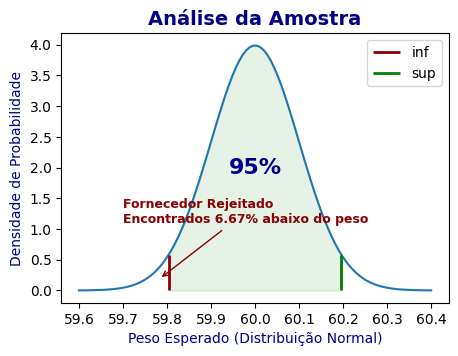

In [ ]:
df_saca = pd.read_csv(path + 'amostra_cafe_extra.csv')

fig, ax = plt.subplots(1,1,figsize=(5, 3.5))

mu = 60
sigma = 0.1

analisa_amostra(df_saca, mu, sigma, ax)
plt.show()

# **CASE: Beer Production**

Você quer fazer analise dos estados produtores de cerveja com produção acima da média dos estados (produção de todos os anos). Para facilitar o uso da rotina pelo time de gestão de produção dos estados você faz uma rotina que exibe o resultados como a seguir, permitindo destacar um dos estados.

Dicas (opcionais):

1. Empregue e altere a rotina `add_value_labels` para adicionar valores às barras
2. Acesse as propriedade `ax.get_xticklabels()[...].set_color('darkred')` e     `ax.patches[...].set_facecolor()` para setar os destaques.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')
df.head()

,state,year,barrels,type
0,AK,2008,2067.69,On Premises
1,AK,2009,2263.65,On Premises
2,AK,2010,1929.15,On Premises
3,AK,2011,2251.02,On Premises
4,AK,2012,2312.43,On Premises


In [ ]:
def add_value_labels(ax, spacing=5):
    """Adiciona os valores em cima das barras de um gráfico Seaborn."""
    for bar in ax.patches:
        y_value = bar.get_height()
        x_value = bar.get_x() + bar.get_width() / 2

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, spacing),        # Vertically shift label by `spacing`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va='bottom'
        )

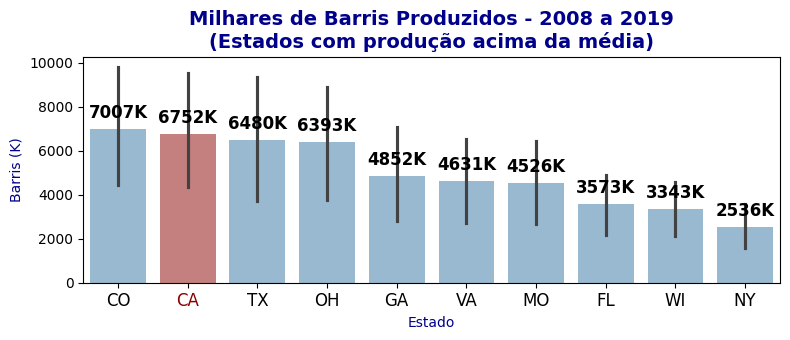

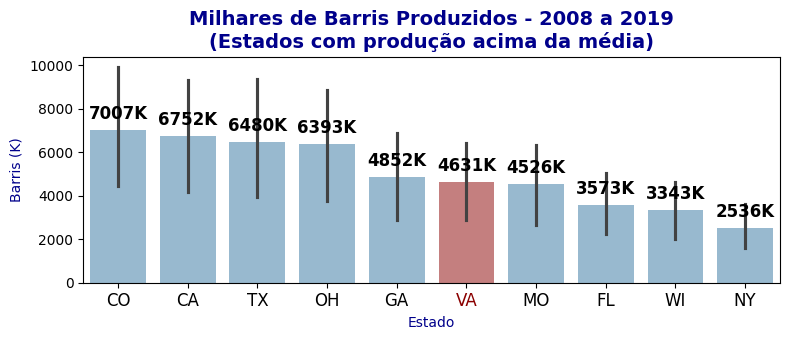

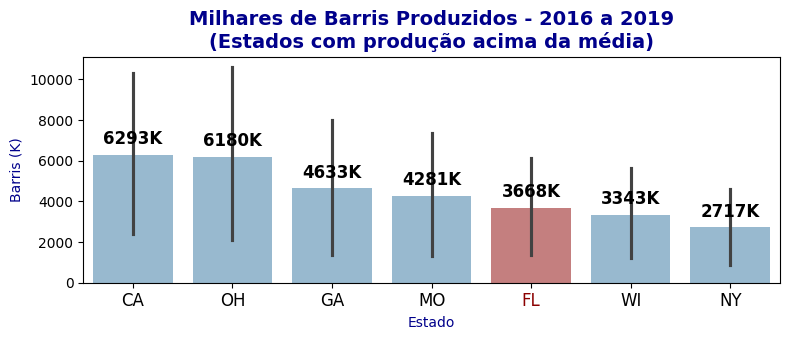

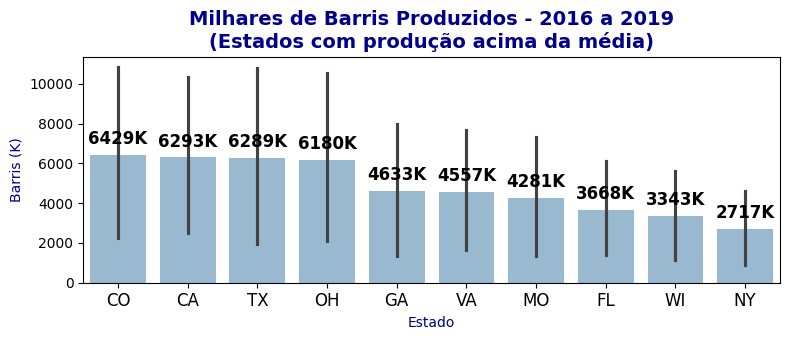

In [ ]:
fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df, 'CA', ax)
plt.show()

fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df, 'VA', ax)
plt.show()

fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df[ (df.year > 2015) & (~df.state.isin(['VA','CO','TX'])) ], 'FL', ax)
plt.show()

fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df[ df.year > 2015 ], 'XX', ax)
plt.show()
